In [2]:
from pyspark.sql import *
from pyspark import SparkContext

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
sc = SparkContext("local", "First")
spark = SparkSession.builder.master("local").appName("First").config("spark.some.config.option", "some-value").getOrCreate()

In [5]:
df = spark.read.format("csv").option("header", "false").load("file:///home/fatory/sber/week_3/delivery")
df=df.selectExpr("_c0 as order_id", "_c1 as purchase", "_c2 as delivery", "_c3 as estimated", "_c4 as difference",
                "_c5 as rate")
df.show(10, truncate = True)

+--------------------+-------------------+-------------------+-------------------+----------------+----+
|            order_id|           purchase|           delivery|          estimated|      difference|rate|
+--------------------+-------------------+-------------------+-------------------+----------------+----+
|8e6bfb81e283fa7e4...|2018-02-10 10:59:03|2018-02-28 16:33:35|2018-03-09 00:00:00| 8 days 07:26:25|   5|
|b18dcdf73be663668...|2018-04-06 22:18:54|2018-04-12 17:17:53|2018-05-03 00:00:00|20 days 06:42:07|   1|
|e48aa0d2dcec3a2e8...|2017-06-30 15:38:46|2017-07-15 12:57:24|2017-08-03 00:00:00|18 days 11:02:36|   5|
|c31a859e34e3adac2...|2018-08-07 23:12:29|2018-08-13 18:08:28|2018-10-10 00:00:00|57 days 05:51:32|   5|
|0ce9a24111d850192...|2017-11-24 01:40:48|2017-12-13 00:28:44|2017-12-19 00:00:00| 5 days 23:31:16|   1|
|8ba3f3a9292fbc22a...|2017-07-07 10:07:16|2017-07-18 23:16:44|2017-07-31 00:00:00|12 days 00:43:16|   5|
|c186ebe3937470a2f...|2017-11-27 13:33:35|2017-12-04 20

In [24]:
dfp = df.toPandas()
dfp = dfp.dropna()

dfp['days'] = dfp['difference'].apply(lambda x :0 if len(x.split(' ')) == 1 else x.split(' ')[0])

dfp['days'] = dfp['days'].astype(int)
dfp['rate'] = dfp['rate'].astype(int)

dfp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97013 entries, 0 to 99999
Data columns (total 7 columns):
order_id      97013 non-null object
purchase      97013 non-null object
delivery      97013 non-null object
estimated     97013 non-null object
difference    97013 non-null object
rate          97013 non-null int64
days          97013 non-null int64
dtypes: int64(2), object(5)
memory usage: 5.9+ MB


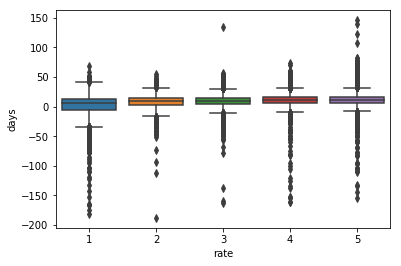

In [37]:
sns.boxplot(data = dfp, x = "rate", y = "days");

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9701 entries, 64486 to 69538
Data columns (total 7 columns):
order_id      9701 non-null object
purchase      9701 non-null object
delivery      9701 non-null object
estimated     9701 non-null object
difference    9701 non-null object
rate          9701 non-null int64
days          9701 non-null int64
dtypes: int64(2), object(5)
memory usage: 606.3+ KB


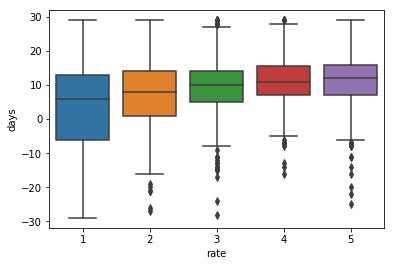

In [42]:
import random

dfp_sample = dfp.sample(frac=0.1)
dfp_sample.info()

sns.boxplot(data = dfp_sample[np.abs(dfp_sample['days']) < 30], x = "rate", y = "days");